# Customer Churn Factors

Telco is a world renowned telecommunications company that provides phone, internet, and streaming services to their customers. As technology evolves, so does the company's business model. In order to stay up to date on current market trends and ensuring the satisfaction of our customers, it is necessary to analyze customer data. As you will soon see, there may be some factors that influence customer churn that can be remediated to keep customers with the company.  Different models are ran to determine what factors have the greatest influence on customer churn and the results will hopefully spark discussion on how to decrease customer churn.

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import acquire
import prepare

## Acquire

* Accquired data from noether sequal server
* data obtained 1/2/2023
* 7043 rows by 24 columns before cleaning
* Each row represents a customer
* Each column represents a demograhic or service type information


In [2]:
telco = acquire.get_telco_data() #acquiring data from server and assigning it to a variable


In [15]:
telco.head() # a brief look at the data

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,...,No,2,Yes,2,65.6,593.3,No,DSL,One year,Mailed check
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,...,Yes,1,No,2,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,...,No,1,Yes,1,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,...,Yes,1,Yes,1,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,...,No,1,Yes,2,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [17]:
service1 = telco[telco['internet_service_type'] == 'DSL']
service2 = telco[telco['internet_service_type'] == 'Fiber optic']
service3 = telco[telco['internet_service_type'] == 'None']


In [23]:
servicechurn1 = service1[service1['churn'] == 'No']
servicechurn2 = service2[service2['churn'] == 'No']
servicechurn3 = service3[service3['churn'] == 'No']

In [28]:
DSL = np.array([459, 1962])
Fiber_optic = np.array([1297, 1799])
nointernet = np.array([113, 1413])

# Explore

In [4]:
churned = telco[telco['churn'] == 'Yes'] #1869

In [5]:
churned = telco[telco['churn'] == 'No'] #5174

In [10]:
y = np.array([1869, 5174])
mylabels = ['churned', 'not churned']

Text(0.5, 1.0, 'churn rate')

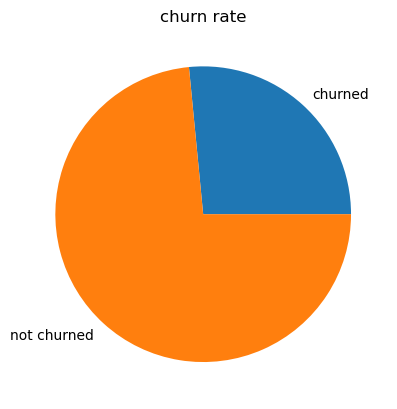

In [32]:
plt.pie(y, labels = mylabels)
plt.title('churn rate')

In [ ]:
DSL = np.array([459, 1962])
Fiber_optic = np.array([1297, 1799])
nointernet = np.array([113, 1413])

Text(0.5, 1.0, 'DSL Churn Rate')

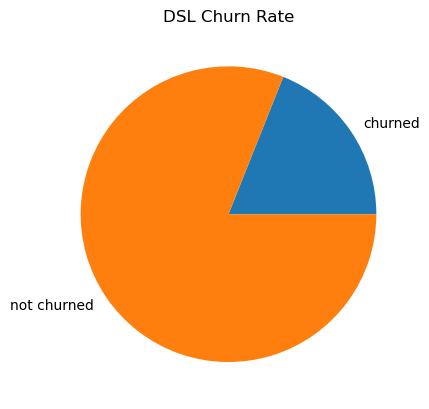

In [33]:
plt.pie(DSL, labels = mylabels)
plt.title('DSL Churn Rate')

Text(0.5, 1.0, 'Fiber Optic Churn Rate')

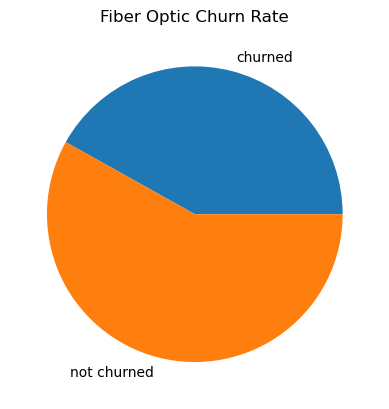

In [34]:
plt.pie(Fiber_optic, labels = mylabels)
plt.title('Fiber Optic Churn Rate')

Text(0.5, 1.0, 'No Internet Churn Rate')

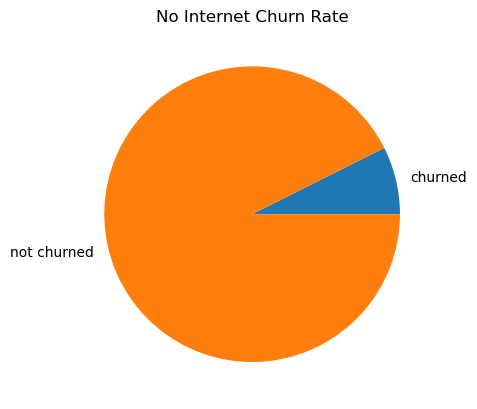

In [35]:
plt.pie(nointernet, labels = mylabels)
plt.title("No Internet Churn Rate")

## Prepare
* Removed columns that did not contain useful information
* Checked for nulls in the data and removed them
* Eliminated rows that did have a space as a value in their total_charges column
* Changed total_charges column object to float
* Added dummy variables for categorical variables
* Split data into train, validate and test (approx. 60/25/15), stratifying on 'churn'
* Scaled continuous variable
* Outliers have not been removed for this iteration of the project

In [ ]:
telco = prepare.prep_classification_project(telco) #function prepares data

## A quick look at the data


In [ ]:
telco.head() #prints the first 5 rows of the cleaned dataset

## A summary of the data

In [ ]:
telco.describe() #statistical description of each of the numerical value columns

In [ ]:
#splits data into train, validate, and test variables
train, test = train_test_split(telco, test_size=.2, random_state=123, stratify=telco.churn)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn)

In [ ]:
#verifying that data was split correctly 
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

In [ ]:
# preparing variables to fit into decision tree model statifying churn
x_train = train.drop(columns = ['churn'])
y_train = train['churn']

x_val = validate.drop(columns = ['churn'])
y_val = validate['churn']

x_test = test.drop(columns = ['churn'])
y_test = test['churn']

In [ ]:
#calling model
seed = 42
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [ ]:
#fitting model
clf.fit(x_train, y_train)

In [ ]:
#showing model
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names= x_train.columns, class_names = np.array(clf.classes_).astype('str').tolist(), rounded = True)
plt.show()

In [ ]:
# Import your prepare function and use it to clean your data here

## Explore

* Here you will explore your data then highlight 4 questions that you asked of the data and how those questions influanced your analysis
* Remember to split your data before exploring how differint variables relate to one another
* Each question should be stated directly 
* Each question should be supported by a vizualization
* Each question should be answered in natural language
* Two questions must be supported by a statistical test, but you may choose to support more than two
* See the following example, and read the comments in the next cell

The following empty code block is here to represent the countless questions, visualizations, and statistical tests 
that did not make your final report. Data scientist often create a myriad of questions, vizualizations 
and statistical tests that do not make it into the final notebook. This is okay and expected. Remember 
that shotgun approches to your data such as using pair plots to look at the relationships of each feature 
pair are a great way to explore your data, but they have no place in your final report. 
**Your final report is about showing your findings, not showing your work!**

## You may use this as a templet for how to ask and answer each question:

### 1) Question about the data
* ask a question about the data for which you got a meaningful result.

### 2) Vizualization of the data answering the question

* vizualizations should be acompanied by take-aways telling the reader exaclty what you want them to get from the chart
* Good take-aways often make for good chart titles. Try to use your chart title instead of bullet points.

### 3) Statistical test
* Be sure you are using the correct statistical test for the type of variables you are testing
* be sure that you are not violating any of the asumptions for the statistical test you are choosing
* your notebook should run and produce the results of the test you are using (This may be done through imports)
* Include an introduction to the kind of test you are doing
* Include the Ho and Ha for the test
* Include the alpha you are using
* Include the readout of the p-value for the test
* Interpret the results of the test in natural language 

### 4) Answer to the question
* Answer the question that you posed of the data by refering to the chart and statistical test (if you used one).
* if question relates to drivers, explain why the feature in question would/wouldn't make a good driver.

## Exploration Summery
* after your explore section before you start modeling provide a summary of your findings in Explore
* Include a summery of your take-aways from Explore including answers to the questions you asked
* Include a summery of the features you examined and weather or not you will be going to Modeling with each feature and why
* It is important to note which features will be going into your model so the reader knows what features you will be modeling on


## Modeling

* Explain how you will be evauating your models. Be sure to include the evaluation metric you will be using and why you have chosen it

### Baseline 
* create a baseline and briefly explain how it was calculated 

In [ ]:
# If your baseline comes from a model run the model here and show it's results

### Best 3 Models
* Show the three best model results obtained using your selected features to predict the target variable
* Tipically students will show the top models they are able to generate for three differint model types

## You may use this as a templet for how to introduce your models:

### Model Type

In [ ]:
# code that runs the best model in that model type (this mad be imported from a module)

Print out of model code should read: <br>
"Model Type" <br>
"evaluation metric" on train: "evaluation result" <br>
"evaluation metric" on validate: "evaluation result"

### Test Model
* Choose the best model out of the three as yout best model and explain why you have chosen it
* Explain that you will now run your final model on test data to guage how it will perform on unseen data


In [ ]:
# Code that runs the best overall model on test data (this may be imported from a module)

Print out of model code should read: <br>
"Model Type" <br>
"evaluation metric" on Test: "evaluation result" <br>

### Modeling Wrap 
* Give a final interpritation of how the models test score compares to the baseline and weather you would recomend this model for production

## Conclution

### Summery
* summerize you findings and answer the questions you brought up in explore 
* summerize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Nest Steps are what you as a Data Scientist would do if provided more time to work on the project

**Where there is code in your report there should also be code comments telling the reader what each code block is doing. this is ture for any and all code blocks even if you are using a function to import the code**

**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist your job is not only to make discoveries but to effectivly communicate them as well. This means documintation is a critical part of your job.**